In [109]:
url = input()

In [108]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [110]:
# open the link
page = requests.get(url)
if page.status_code != 200:
    print('couldn\'t open url')

soup = BeautifulSoup(page.text, "html.parser")

# get main tag name
tag_name = soup.find('h2',class_='heading').find('a',class_='tag').text


In [111]:
# get data 
def get_df(id,x_names):

    # find the list of relationships on site
    ships = soup.find('dd', {'id':id}).find('ul')

    # add every ship to the list
    ship_list_raw = []
    for li in ships.find_all('li'):
        ship_list_raw.append(li.text.strip())

    # separate name and number of works from str
    ship_list = []
    for str in ship_list_raw:
        ship_list.append(str.rsplit(' ',1))

    # create df
    df = pd.DataFrame(ship_list,columns=[x_names, 'Number of works']).set_index(x_names)

    # transform numbers from string to integers and remove parenthesis
    df['Number of works'] = df['Number of works'].str.replace(r'\D', '').astype(int)

    # sort by ascending order
    df = df.sort_values(by = 'Number of works', ascending=True)
    
    return df


df_ratings = get_df('include_rating_tags','Ratings')
df_warnings = get_df('include_archive_warning_tags','Warnings')
df_categories = get_df('include_category_tags','Categories')
df_fandoms = get_df('include_fandom_tags','Fandoms')
df_characters = get_df('include_character_tags','Characters')
df_ships = get_df('include_relationship_tags','Ships')
df_tags = get_df('include_freeform_tags','Tags')


def plot_charts(df):
    if df.index.name == 'Ratings' or df.index.name == 'Warnings' or df.index.name == 'Categories':
        title = 'Distribution of {} for {}'.format(df.index.name,tag_name)
    else:
        title = 'Top {} {} for {}'.format(len(df.index),df.index.name,tag_name) 
    
    df.plot(kind='pie', startangle=90, subplots=True, autopct='%1.1f%%', legend=False,ylabel = '',title=title)
    df.plot(kind='barh',grid=True,zorder=2,title=title,ylabel='Number of works',xlabel='',legend=False,)


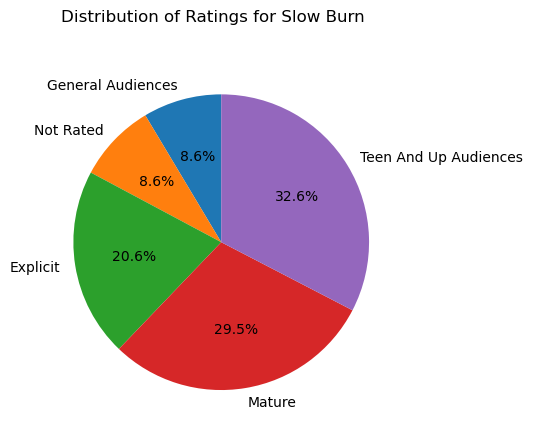

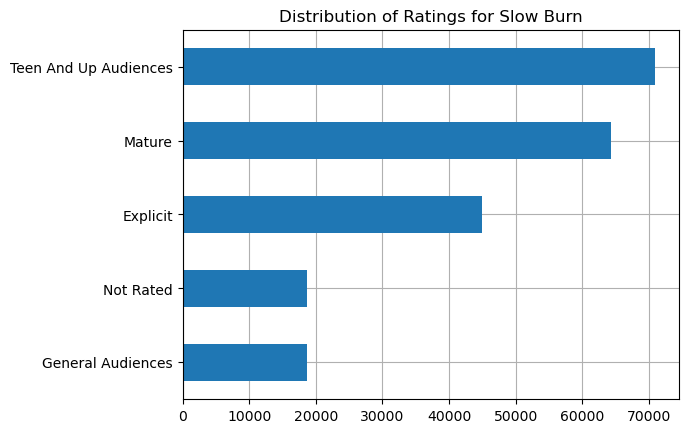

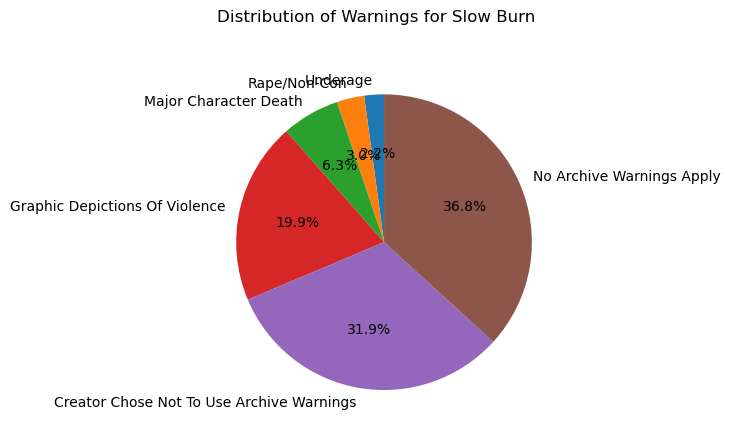

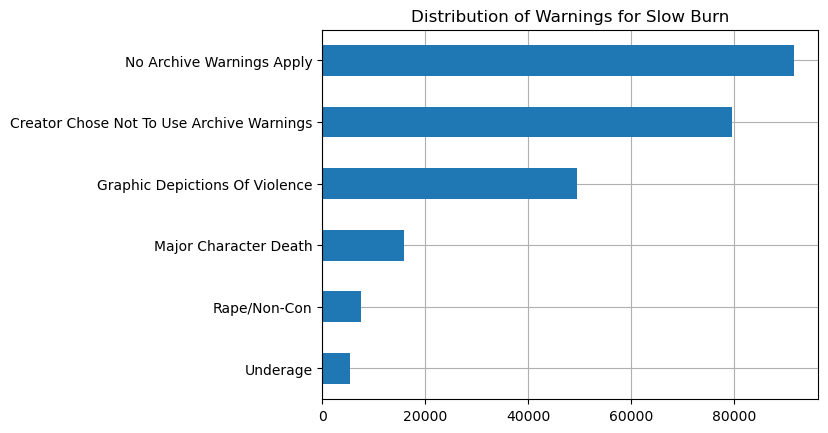

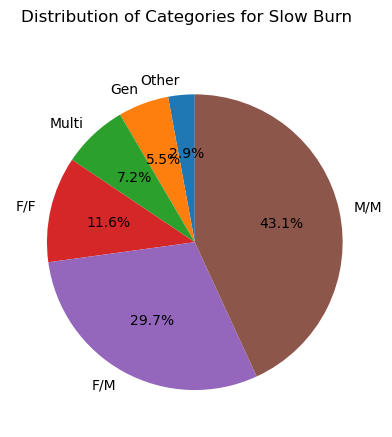

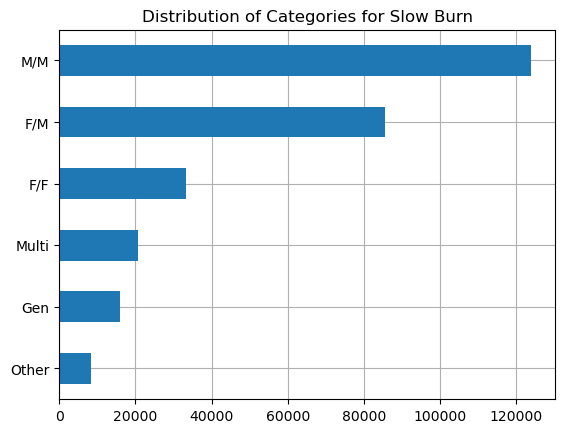

c:\Users\tnjtv\miniconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tnjtv\miniconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tnjtv\miniconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tnjtv\miniconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tnjtv\miniconda3\envs\myEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig

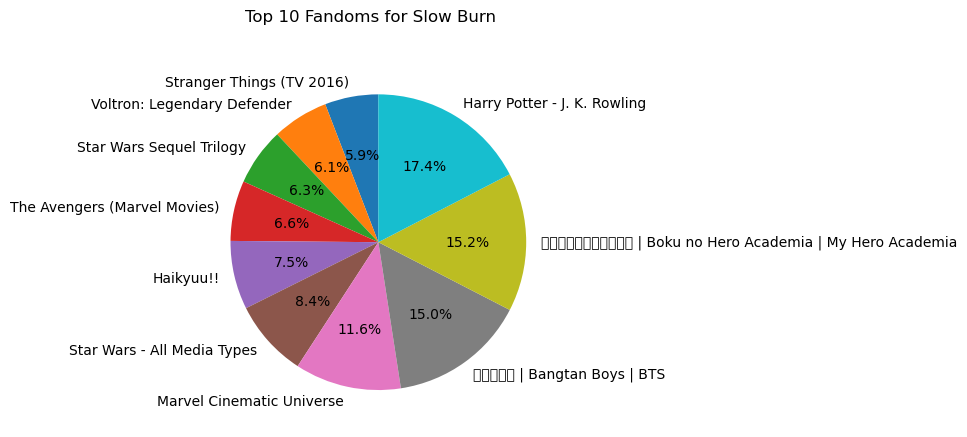

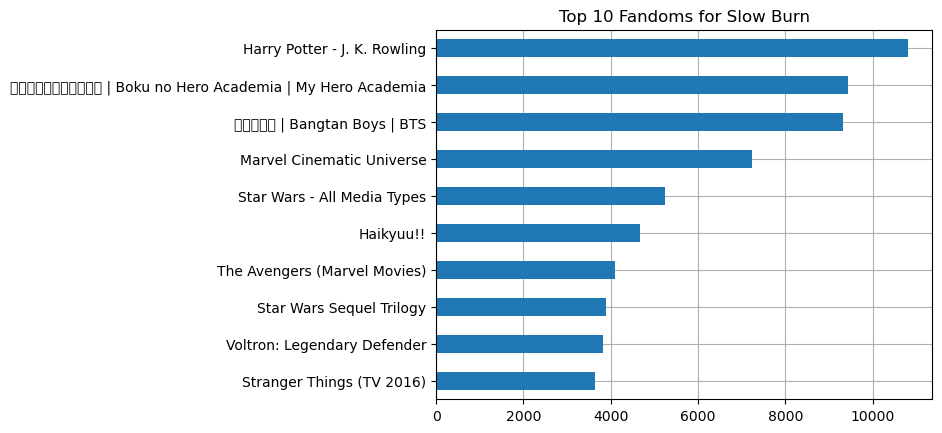

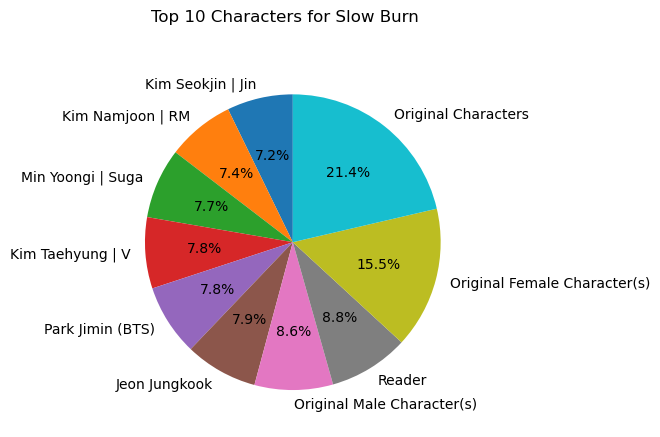

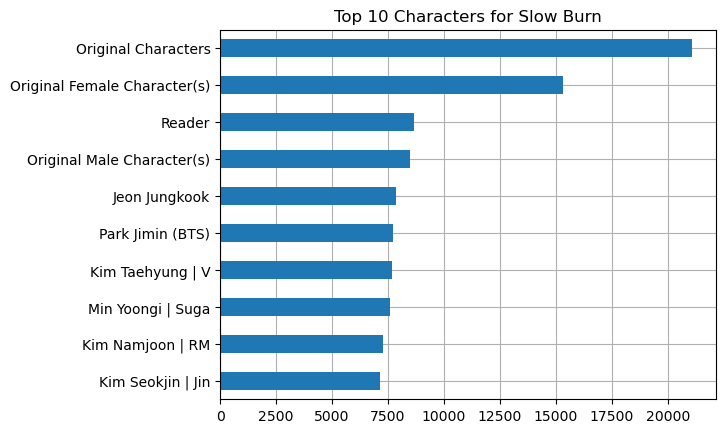

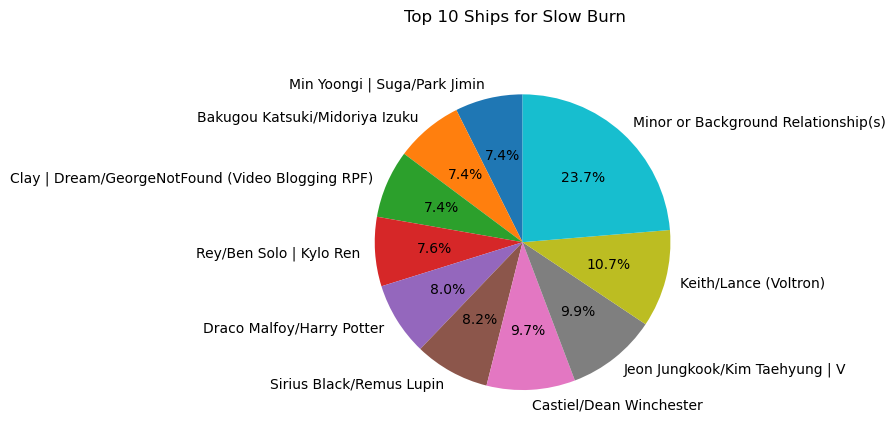

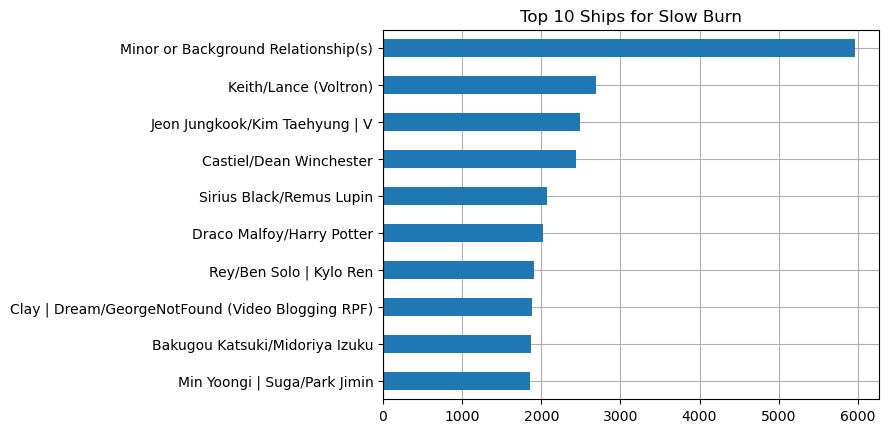

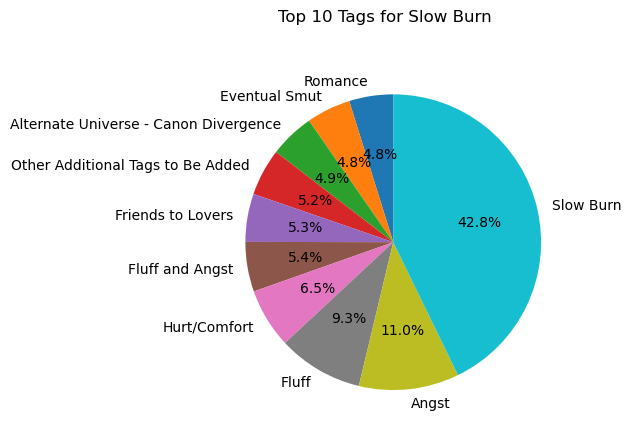

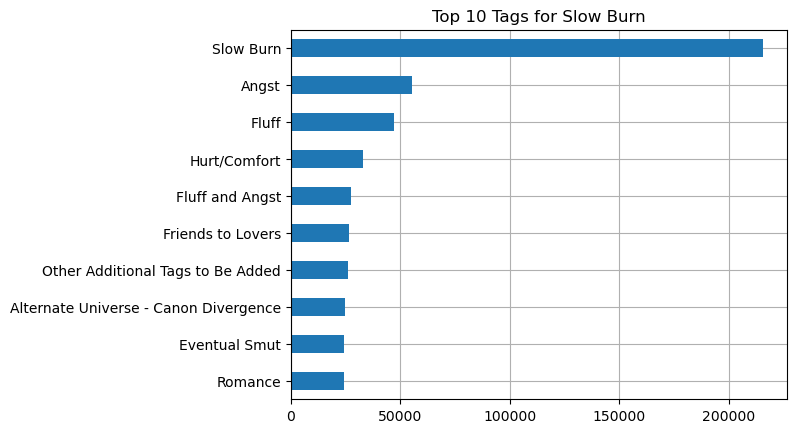

In [114]:

plot_charts(df_ratings)
plot_charts(df_warnings)
plot_charts(df_categories)
plot_charts(df_fandoms)
plot_charts(df_characters)
plot_charts(df_ships)
plot_charts(df_tags)